<a href="https://colab.research.google.com/github/fadhan654/latihan1/blob/main/Remed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python numpy matplotlib

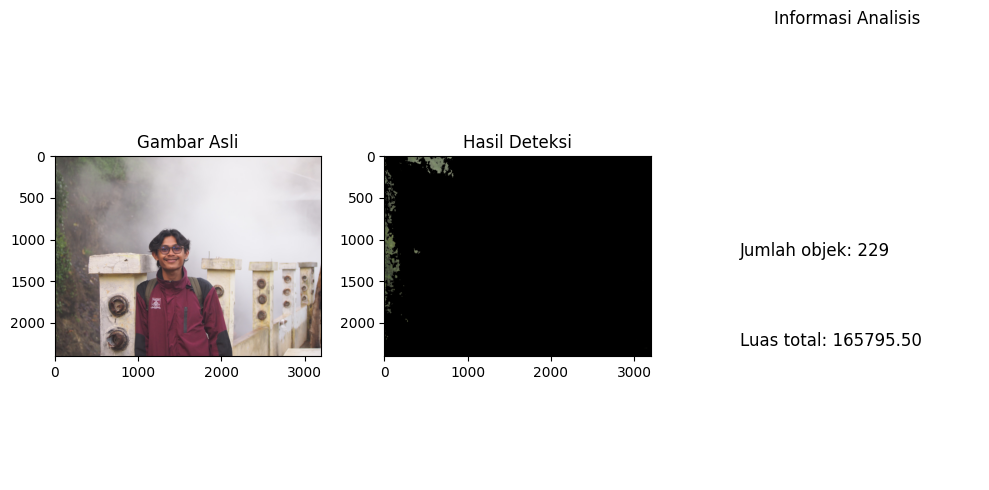

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung luas objek
def calculate_area(contours):
    area = 0
    for cnt in contours:
        area += cv2.contourArea(cnt)
    return area

# Baca gambar
image = cv2.imread('fadhlan.jpg')

# Konversi gambar ke ruang warna HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tentukan rentang warna yang ingin dideteksi (misalnya warna hijau)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

# Terapkan thresholding untuk mendeteksi warna hijau
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Menggunakan mask untuk mendapatkan gambar hasil deteksi
result = cv2.bitwise_and(image, image, mask=mask)

# Temukan kontur objek
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Hitung luas objek yang terdeteksi
total_area = calculate_area(contours)

# Tampilkan gambar asli, gambar hasil deteksi, dan informasi luas objek
plt.figure(figsize=(10, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Gambar Hasil Deteksi
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Hasil Deteksi')

# Informasi Luas Objek
plt.subplot(1, 3, 3)
plt.text(0.1, 0.5, f'Jumlah objek: {len(contours)}', fontsize=12)
plt.text(0.1, 0.3, f'Luas total: {total_area:.2f}', fontsize=12)
plt.axis('off')
plt.title('Informasi Analisis')

plt.tight_layout()
plt.show()
